In [1]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

You should consider upgrading via the '/Users/ananthgoyal/.pyenv/versions/3.8-dev/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/ananthgoyal/.pyenv/versions/3.8-dev/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/ananthgoyal/.pyenv/versions/3.8-dev/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/ananthgoyal/.pyenv/versions/3.8-dev/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [38]:
# The starter code is short and simple, take a look!
from starter import *
from networkx.algorithms import community
import copy

# Phase 1 - Create Inputs

In [39]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # TODO add edges to complete the small input
    for i in range(50):
        for j in range(50, 100):
            G.add_edge(i, j, weight = 250)
    
def medium(G: nx.Graph):
    # TODO add edges to complete the medium input
    # 3 teams
    for i in range(100):
        for j in range(100, 300, 4):
            G.add_edge(i, j, weight = 100)
    for i in range(100, 200):
        for j in range(200, 300, 4):
            G.add_edge(i, j, weight = 100) 
    
def large(G: nx.Graph):
    # TODO add edges to complete the large input
    gap = 100
    for i in range(250):
        for j in range (250, 1000, gap):
            G.add_edge(i, j, weight = 200)
    for i in range(250, 500):
        for j in range (500, 1000, gap):
            G.add_edge(i, j, weight = 200)
    for i in range(500, 750):
        for j in range (750, 1000, gap):
            G.add_edge(i, j, weight = 200)
  

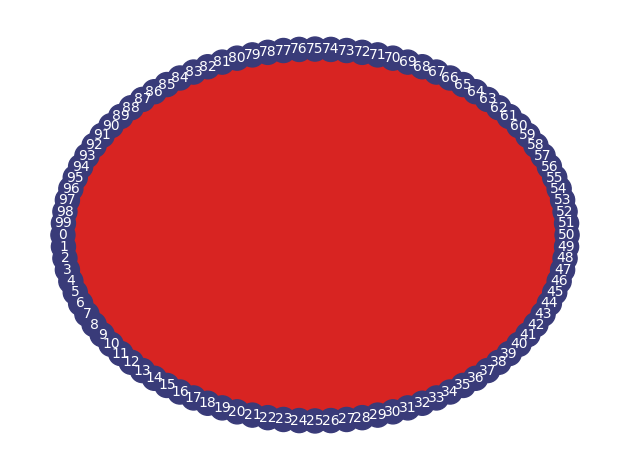

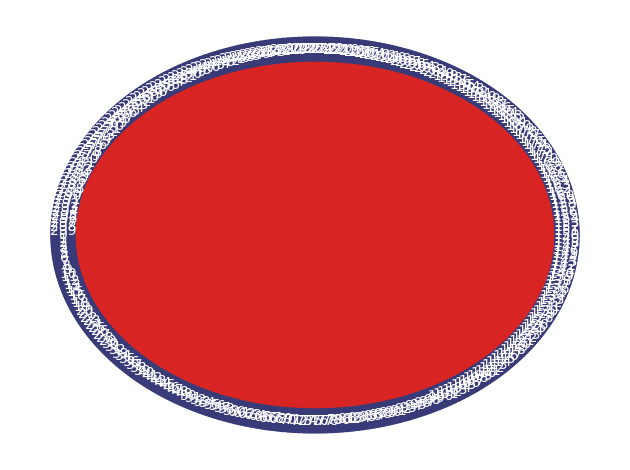

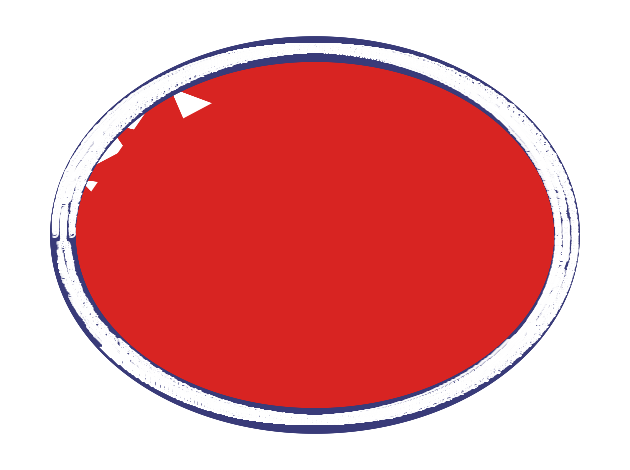

In [11]:
G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in', overwrite=True)
visualize(G)


G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in', overwrite=True)
visualize(G)


G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in', overwrite=True)
visualize(G)

# Phase 2 - Implement your Solver

In [53]:
def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']
    '''for i in range(50):
        G.nodes[i]['team'] = 1
    for i in range(50, 100):
        G.nodes[i]['team'] = 2'''
    G_prime = copy.copy(G)
    num_nodes = G_prime.number_of_nodes()
    for i in range(num_nodes):
        for j in range(i, num_nodes):
            if not G_prime.has_edge(i, j):
                G_prime.add_edge(i, j, weight = 1/1001)
            else:
                G_prime.add_edge(i, j, weight = 1/(G_prime[i][j]['weight']))

    
    tpl = nx.algorithms.community.kernighan_lin_bisection(G_prime, partition=None, max_iter=10, weight='weight', seed=None)
   
    for node in tpl[0]:
        G.nodes[node]['team'] = 1
    for node in tpl[1]:
        G.nodes[node]['team'] = 2
    

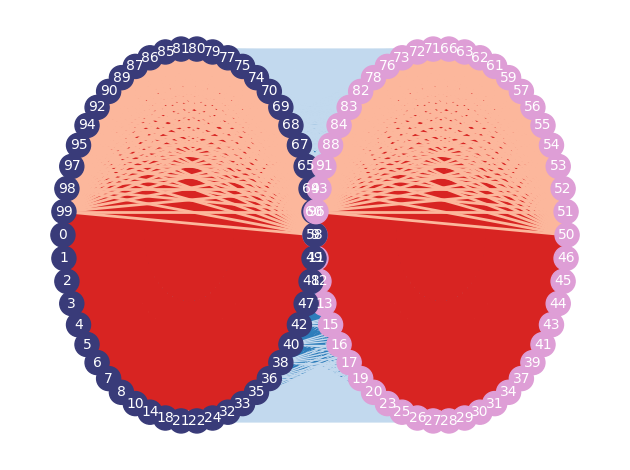

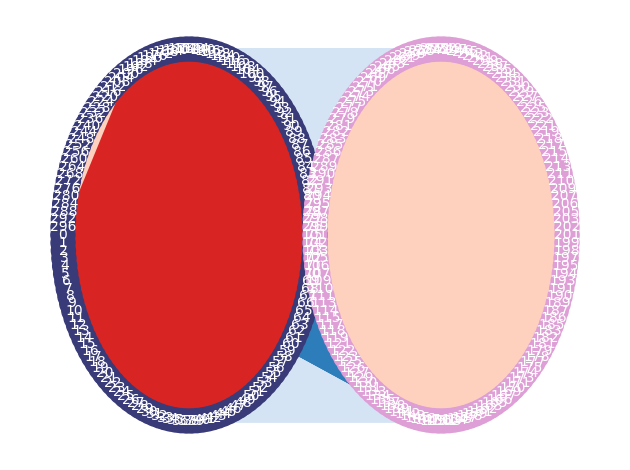

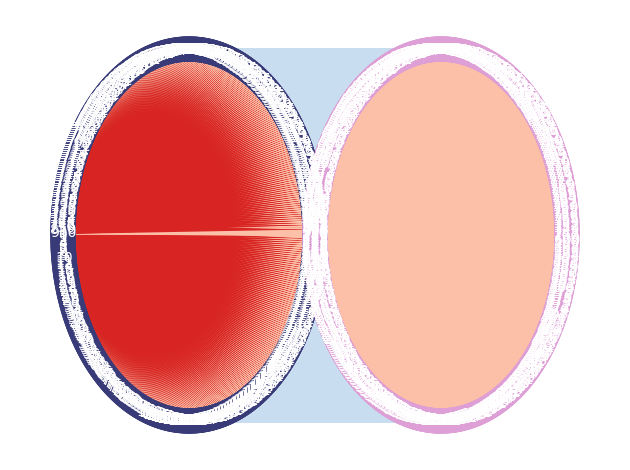

538.9498961328243

In [55]:
G = read_input('small.in')
solve(G)
validate_output(G)
visualize(G)
score(G)
G = read_input('medium.in')
solve(G)
validate_output(G)
visualize(G)
score(G)
G = read_input('large.in')
solve(G)
validate_output(G)
visualize(G)
score(G)

In [ ]:
run(solve, 'small.in', 'small.out')

In [ ]:
run_all(solve, 'input', 'output')
tar('output')